In [0]:
import pandas as pd
import numpy as np
import seaborn as sns

In [0]:
from pyspark.sql import SparkSession

In [0]:
spark = SparkSession.builder.appName('ANN').getOrCreate()

In [0]:
df_spark = spark.read.csv('/FileStore/tables/fake_reg.csv',inferSchema=True,header=True)

In [0]:
df = df_spark.toPandas()

In [0]:
df.head()

Out[130]:

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


Out[131]:

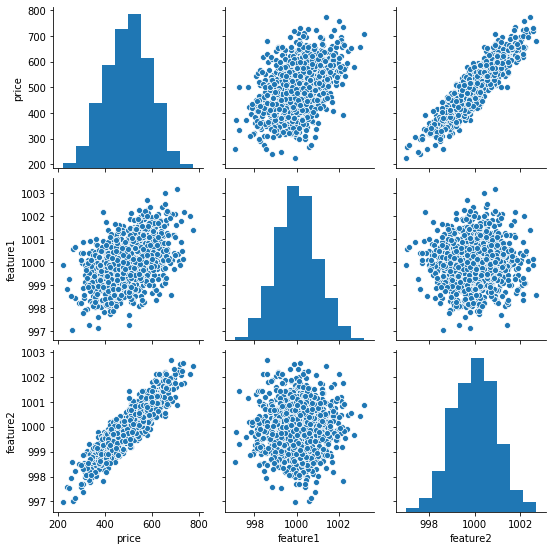

<seaborn.axisgrid.PairGrid at 0x7f6d3e2c5810>

In [0]:
sns.pairplot(df)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = df[['feature1','feature2']].values

In [0]:
y = df['price'].values

In [0]:
X

Out[135]: array([[ 999.78755752, 999.7660962 ],
 [ 998.86161491, 1001.04240315],
 [1000.07026691, 998.84401463],
 ...,
 [1001.45164617, 998.84760554],
 [1000.77102275, 998.56285086],
 [ 999.2322436 , 1001.45140713]])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [0]:
X_train.shape

Out[137]: (700, 2)

In [0]:
X_test.shape

Out[138]: (300, 2)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 MinMaxScaler(feature_range=(0, 1), copy=True)
 
 Transform features by scaling each feature to a given range.
 
 This estimator scales and translates each feature individually such
 that it is in the given range on the training set, e.g. between
 zero and one.
 
 The transformation is given by::
 
 X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 X_scaled = X_std * (max - min) + min
 
 where min, max = feature_range.
 
 The transformation is calculated as::
 
 X_scaled = scale * X + min - X.min(axis=0) * scale
 where scale = (max - min) / (X.max(axis=0) - X.min(axis=0))
 
 This transformation is often used as an alternative to zero mean,
 unit variance scaling.
 
 Read more in the :ref:`User Guide <preprocessing_scaler>`.
 
 Parameters
 ----------
 feature_range : tuple (min, max), default=(0, 1)
 Desired range of transformed data.
 
 copy : bool, default=True
 Set to False to perform inplace row normalization and avoid a
 copy (if the input is already a numpy array).
 
 Attributes
 ----------
 min_ : ndarray of shape (n_features,)
 Per feature adjustment for minimum. Equivalent to
 ``min - X.min(axis=0) * self.scale_``
 
 scale_ : ndarray of shape (n_features,)
 Per feature relative scaling of the data. Equivalent to
 ``(max - min) / (X.max(axis=0) - X.min(axis=0))``
 
 .. versionadded:: 0.17
 *scale_* attribute.
 
 data_min_ : ndarray of shape (n_features,)
 Per feature minimum seen in the data
 
 .. versionadded:: 0.17
 *data_min_*
 
 data_max_ : ndarray of shape (n_features,)
 Per feature maximum seen in the data
 
 .. versionadded:: 0.17
 *data_max_*
 
 data_range_ : ndarray of shape (n_features,)
 Per feature range ``(data_max_ - data_min_)`` seen in the data
 
 .. versionadded:: 0.17
 *data_range_*
 
 n_samples_seen_ : int
 The number of samples processed by the estimator.
 It will be reset on new calls to fit, but increments across
 ``partial_fit`` calls.
 
 Examples
 --------
 >>> from sklearn.preprocessing import MinMaxScaler
 >>> data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
 >>> scaler = MinMaxScaler()
 >>> print(scaler.fit(data))
 MinMaxScaler()
 >>> print(scaler.data_max_)
 [ 1. 18.]
 >>> print(scaler.transform(data))
 [[0. 0. ]
 [0.25 0.25]
 [0.5 0.5 ]
 [1. 1. ]]
 >>> print(scaler.transform([[2, 2]]))
 [[1.5 0. ]]
 
 See also
 --------
 minmax_scale: Equivalent function without the estimator API.
 
 Notes
 -----
 NaNs are treated as missing values: disregarded in fit, and maintained in
 transform.
 
 For a comparison of the different scalers, transformers, and normalizers,
 see :ref:`examples/preprocessing/plot_all_scaling.py
 <sphx_glr_auto_examples_preprocessing_plot_all_scaling.py>`.
 
 Method resolution order:
 MinMaxScaler
 sklearn.base.TransformerMixin
 sklearn.base.BaseEstimator
 builtins.object
 
 Methods defined here:
 
 __init__(self, feature_range=(0, 1), copy=True)
 Initialize self. See help(type(self)) for accurate signature.
 
 fit(self, X, y=None)
 Compute the minimum and maximum to be used for later scaling.
 
 Parameters
 ----------
 X : array-like of shape (n_samples, n_features)
 The data used to compute the per-feature minimum and maximum
 used for later scaling along the features axis.
 
 y : None
 Ignored.
 
 Returns
 -------
 self : object
 Fitted scaler.
 
 inverse_transform(self, X)
 Undo the scaling of X according to feature_range.
 
 Parameters
 ----------
 X : array-like of shape (n_samples, n_features)
 Input data that will be transformed. It cannot be sparse.
 
 Returns
 -------
 Xt : array-like of shape (n_samples, n_features)
 Transformed data.
 
 partial_fit(self, X, y=None)
 Online computation of min and max on X for later scaling.
 
 All of X is processed as a single batch. This is intended for cases
 when :meth:`fit` is not feasible due to very large number of
 `n_samples` or because X is read from a continuous stream.


In [0]:
scaler = MinMaxScaler()

In [0]:
scaler.fit(X_train)

Out[142]: MinMaxScaler(copy=True, feature_range=(0, 1))

In [0]:
X_train = scaler.transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
print(X_train.min(), X_train.max())

0.0 1.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
help(Dense)

Help on class Dense in module tensorflow.python.keras.layers.core:

class Dense(tensorflow.python.keras.engine.base_layer.Layer)
 Dense(*args, **kwargs)
 
 Just your regular densely-connected NN layer.
 
 `Dense` implements the operation:
 `output = activation(dot(input, kernel) + bias)`
 where `activation` is the element-wise activation function
 passed as the `activation` argument, `kernel` is a weights matrix
 created by the layer, and `bias` is a bias vector created by the layer
 (only applicable if `use_bias` is `True`).
 
 Note: If the input to the layer has a rank greater than 2, then `Dense`
 computes the dot product between the `inputs` and the `kernel` along the
 last axis of the `inputs` and axis 1 of the `kernel` (using `tf.tensordot`).
 For example, if input has dimensions `(batch_size, d0, d1)`,
 then we create a `kernel` with shape `(d1, units)`, and the `kernel` operates
 along axis 2 of the `input`, on every sub-tensor of shape `(1, 1, d1)`
 (there are `batch_size * d0` such sub-tensors).
 The output in this case will have shape `(batch_size, d0, units)`.
 
 Besides, layer attributes cannot be modified after the layer has been called
 once (except the `trainable` attribute).
 
 Example:
 
 >>> # Create a `Sequential` model and add a Dense layer as the first layer.
 >>> model = tf.keras.models.Sequential()
 >>> model.add(tf.keras.Input(shape=(16,)))
 >>> model.add(tf.keras.layers.Dense(32, activation='relu'))
 >>> # Now the model will take as input arrays of shape (None, 16)
 >>> # and output arrays of shape (None, 32).
 >>> # Note that after the first layer, you don't need to specify
 >>> # the size of the input anymore:
 >>> model.add(tf.keras.layers.Dense(32))
 >>> model.output_shape
 (None, 32)
 
 Arguments:
 units: Positive integer, dimensionality of the output space.
 activation: Activation function to use.
 If you don't specify anything, no activation is applied
 (ie. "linear" activation: `a(x) = x`).
 use_bias: Boolean, whether the layer uses a bias vector.
 kernel_initializer: Initializer for the `kernel` weights matrix.
 bias_initializer: Initializer for the bias vector.
 kernel_regularizer: Regularizer function applied to
 the `kernel` weights matrix.
 bias_regularizer: Regularizer function applied to the bias vector.
 activity_regularizer: Regularizer function applied to
 the output of the layer (its "activation").
 kernel_constraint: Constraint function applied to
 the `kernel` weights matrix.
 bias_constraint: Constraint function applied to the bias vector.
 
 Input shape:
 N-D tensor with shape: `(batch_size, ..., input_dim)`.
 The most common situation would be
 a 2D input with shape `(batch_size, input_dim)`.
 
 Output shape:
 N-D tensor with shape: `(batch_size, ..., units)`.
 For instance, for a 2D input with shape `(batch_size, input_dim)`,
 the output would have shape `(batch_size, units)`.
 
 Method resolution order:
 Dense
 tensorflow.python.keras.engine.base_layer.Layer
 tensorflow.python.module.module.Module
 tensorflow.python.training.tracking.tracking.AutoTrackable
 tensorflow.python.training.tracking.base.Trackable
 tensorflow.python.keras.utils.version_utils.LayerVersionSelector
 builtins.object
 
 Methods defined here:
 
 __init__(self, units, activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
 
 build(self, input_shape)
 Creates the variables of the layer (optional, for subclass implementers).
 
 This is a method that implementers of subclasses of `Layer` or `Model`
 can override if they need a state-creation step in-between
 layer instantiation and layer call.
 
 This is typically used to create the weights of `Layer` subclasses.
 
 Arguments:
 input_shape: Instance of `TensorShape`, or list of instances of
 `TensorShape` if the layer expects a list of inputs
 (one instance per input).
 
 call(self, inputs)


In [0]:
model = Sequential([Dense(4,activation='relu')
                    ,Dense(2,activation='relu')
                    ,Dense(1)
                   ])

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(2,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop'
              ,loss='mse'
             )

In [0]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop'
              ,loss='mse'
             )

In [0]:
model.fit(x=X_train
          ,y=y_train
          ,epochs=250
          ,verbose=2
         )

Epoch 1/250
22/22 - 0s - loss: 256828.6094
Epoch 2/250
22/22 - 0s - loss: 256712.1406
Epoch 3/250
22/22 - 0s - loss: 256658.3125
Epoch 4/250
22/22 - 0s - loss: 256603.4219
Epoch 5/250
22/22 - 0s - loss: 256536.5312
Epoch 6/250
22/22 - 0s - loss: 256451.6406
Epoch 7/250
22/22 - 0s - loss: 256343.0469
Epoch 8/250
22/22 - 0s - loss: 256206.7188
Epoch 9/250
22/22 - 0s - loss: 256041.4219
Epoch 10/250
22/22 - 0s - loss: 255843.7969
Epoch 11/250
22/22 - 0s - loss: 255607.9062
Epoch 12/250
22/22 - 0s - loss: 255328.9844
Epoch 13/250
22/22 - 0s - loss: 255002.0625
Epoch 14/250
22/22 - 0s - loss: 254623.7969
Epoch 15/250
22/22 - 0s - loss: 254185.3750
Epoch 16/250
22/22 - 0s - loss: 253677.5469
Epoch 17/250
22/22 - 0s - loss: 253097.9219
Epoch 18/250
22/22 - 0s - loss: 252437.5312
Epoch 19/250
22/22 - 0s - loss: 251692.2344
Epoch 20/250
22/22 - 0s - loss: 250858.6094
Epoch 21/250
22/22 - 0s - loss: 249924.0625
Epoch 22/250
22/22 - 0s - loss: 248879.1250
Epoch 23/250
22/22 - 0s - loss: 247730.6094
Epoch 24/250
22/22 - 0s - loss: 246454.3281
Epoch 25/250
22/22 - 0s - loss: 245048.0938
Epoch 26/250
22/22 - 0s - loss: 243500.9375
Epoch 27/250
22/22 - 0s - loss: 241774.7656
Epoch 28/250
22/22 - 0s - loss: 239878.6562
Epoch 29/250
22/22 - 0s - loss: 237799.0625
Epoch 30/250
22/22 - 0s - loss: 235534.9688
Epoch 31/250
22/22 - 0s - loss: 233083.4062
Epoch 32/250
22/22 - 0s - loss: 230408.2500
Epoch 33/250
22/22 - 0s - loss: 227510.3594
Epoch 34/250
22/22 - 0s - loss: 224409.8750
Epoch 35/250
22/22 - 0s - loss: 221048.5312
Epoch 36/250
22/22 - 0s - loss: 217447.3438
Epoch 37/250
22/22 - 0s - loss: 213608.6562
Epoch 38/250
22/22 - 0s - loss: 209461.4844
Epoch 39/250
22/22 - 0s - loss: 205078.7188
Epoch 40/250
22/22 - 0s - loss: 200441.0781
Epoch 41/250
22/22 - 0s - loss: 195506.2344
Epoch 42/250
22/22 - 0s - loss: 190302.8281
Epoch 43/250
22/22 - 0s - loss: 184831.2031
Epoch 44/250
22/22 - 0s - loss: 179092.0312
Epoch 45/250
22/22 - 0s - loss: 173092.6719
Epoch 46/250
22/22 - 0s - loss: 166753.0000
Epoch 47/250
22/22 - 0s - loss: 160208.1094
Epoch 48/250
22/22 - 0s - loss: 153428.4062
Epoch 49/250
22/22 - 0s - loss: 146381.6875
Epoch 50/250
22/22 - 0s - loss: 139110.0312
Epoch 51/250
22/22 - 0s - loss: 131599.4219
Epoch 52/250
22/22 - 0s - loss: 123891.0391
Epoch 53/250
22/22 - 0s - loss: 116074.5000
Epoch 54/250
22/22 - 0s - loss: 108073.0859
Epoch 55/250
22/22 - 0s - loss: 100016.8125
Epoch 56/250
22/22 - 0s - loss: 91855.0547
Epoch 57/250
22/22 - 0s - loss: 83674.0000
Epoch 58/250
22/22 - 0s - loss: 75546.5625
Epoch 59/250
22/22 - 0s - loss: 67486.9062
Epoch 60/250
22/22 - 0s - loss: 59528.5195
Epoch 61/250
22/22 - 0s - loss: 51815.5664
Epoch 62/250
22/22 - 0s - loss: 44360.9297
Epoch 63/250
22/22 - 0s - loss: 37210.1133
Epoch 64/250
22/22 - 0s - loss: 30510.0625
Epoch 65/250
22/22 - 0s - loss: 24331.4141
Epoch 66/250
22/22 - 0s - loss: 18758.7656
Epoch 67/250
22/22 - 0s - loss: 13846.4932
Epoch 68/250
22/22 - 0s - loss: 9776.7803
Epoch 69/250
22/22 - 0s - loss: 6588.4551
Epoch 70/250
22/22 - 0s - loss: 4354.5088
Epoch 71/250
22/22 - 0s - loss: 3039.9907
Epoch 72/250
22/22 - 0s - loss: 2538.2683
Epoch 73/250
22/22 - 0s - loss: 2446.9998
Epoch 74/250
22/22 - 0s - loss: 2404.7097
Epoch 75/250
22/22 - 0s - loss: 2356.1953
Epoch 76/250
22/22 - 0s - loss: 2308.3555
Epoch 77/250
22/22 - 0s - loss: 2262.4146
Epoch 78/250
22/22 - 0s - loss: 2214.6101
Epoch 79/250
22/22 - 0s - loss: 2168.1079
Epoch 80/250
22/22 - 0s - loss: 2123.3254
Epoch 81/250
22/22 - 0s - loss: 2074.6267
Epoch 82/250
22/22 - 0s - loss: 2019.7214
Epoch 83/250
22/22 - 0s - loss: 1968.6122
Epoch 84/250
22/22 - 0s - loss: 1933.7538
Epoch 85/250
22/22 - 0s - loss: 1885.4779
Epoch 86/250
22/22 - 0s - loss: 1842.5884
Epoch 87/250
22/22 - 0s - loss: 1803.0023
Epoch 88/250
22/22 - 0s - loss: 1758.8325
Epoch 89/250
22/22 - 0s - loss: 1712.0125
Epoch 90/250
22/22 - 0s - loss: 1662.5474
Epoch 91/250
22/22 - 0s - loss: 1619.1204
Epoch 92/250
22/22 - 0s - loss: 1583.8608
Epoch 93/250
22/22 - 0s

In [0]:
loss_df = pd.DataFrame(model.history.history)

Out[153]:

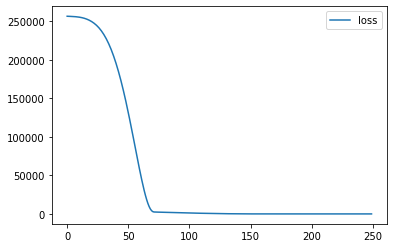

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3d9a4810>

In [0]:
loss_df.plot()

In [0]:
model.evaluate(X_test,y_test,verbose=1)

1/10 [==>...........................] - ETA: 0s - loss: 32.922110/10 [==============================] - 0s 706us/step - loss: 24.9465
Out[154]: 24.946521759033203

In [0]:
model.evaluate(X_train,y_train,verbose=1)

1/22 [>.............................] - ETA: 0s - loss: 19.650922/22 [==============================] - 0s 702us/step - loss: 23.8821
Out[155]: 23.882083892822266

In [0]:
test_predictions = model.predict(X_test)

In [0]:
test_predictions

Out[157]: array([[405.1741 ],
 [623.5217 ],
 [592.10095],
 [572.18286],
 [366.47882],
 [579.14087],
 [514.9816 ],
 [459.0181 ],
 [549.1917 ],
 [447.4255 ],
 [611.7629 ],
 [548.89935],
 [418.9902 ],
 [408.75473],
 [651.24164],
 [437.1995 ],
 [508.38705],
 [659.92615],
 [662.5816 ],
 [565.4957 ],
 [334.07782],
 [444.73575],
 [382.39893],
 [378.62784],
 [566.5517 ],
 [610.5663 ],
 [532.33167],
 [427.7554 ],
 [655.4382 ],
 [413.9719 ],
 [442.53943],
 [485.04837],
 [438.31418],
 [681.8548 ],
 [424.65436],
 [417.5743 ],
 [501.86057],
 [550.4256 ],
 [509.66122],
 [395.23276],
 [618.57263],
 [416.51956],
 [604.42426],
 [445.8663 ],
 [501.91708],
 [581.68506],
 [669.008 ],
 [490.3276 ],
 [318.427 ],
 [485.3475 ],
 [517.20026],
 [381.66827],
 [541.8586 ],
 [408.48135],
 [641.51215],
 [490.99966],
 [627.92584],
 [626.9894 ],
 [446.97528],
 [484.6229 ],
 [491.05914],
 [474.45807],
 [682.7995 ],
 [403.17203],
 [701.15497],
 [586.36523],
 [583.0879 ],
 [537.8029 ],
 [484.49738],
 [516.49567],
 [361.09103],
 [540.7026 ],
 [570.5888 ],
 [528.40216],
 [453.6301 ],
 [531.0855 ],
 [507.1432 ],
 [443.23822],
 [543.31586],
 [640.7484 ],
 [465.9235 ],
 [567.2196 ],
 [690.7834 ],
 [458.64603],
 [708.93427],
 [472.61435],
 [403.16635],
 [585.07135],
 [436.6594 ],
 [488.88898],
 [617.0204 ],
 [439.38028],
 [455.2378 ],
 [435.15994],
 [506.8448 ],
 [608.42645],
 [321.4788 ],
 [436.17294],
 [536.2897 ],
 [518.57306],
 [605.02924],
 [525.38904],
 [333.9913 ],
 [576.1303 ],
 [431.6832 ],
 [562.5143 ],
 [513.34247],
 [390.9661 ],
 [566.2122 ],
 [454.70926],
 [448.39322],
 [640.9556 ],
 [524.31854],
 [550.6419 ],
 [417.58755],
 [478.66287],
 [586.4932 ],
 [667.38214],
 [700.483 ],
 [659.39624],
 [560.5245 ],
 [503.1078 ],
 [390.2372 ],
 [281.1737 ],
 [479.53723],
 [616.3561 ],
 [373.1882 ],
 [512.19885],
 [510.9645 ],
 [493.41525],
 [480.38278],
 [423.6877 ],
 [493.38702],
 [471.39093],
 [600.4258 ],
 [573.5478 ],
 [414.85928],
 [630.63885],
 [466.28943],
 [564.29956],
 [405.57642],
 [532.1228 ],
 [572.6022 ],
 [356.94547],
 [549.7916 ],
 [603.33655],
 [384.18243],
 [542.3451 ],
 [562.5565 ],
 [452.79715],
 [632.1983 ],
 [372.12833],
 [474.17487],
 [528.81537],
 [372.17496],
 [461.15317],
 [436.2164 ],
 [498.428 ],
 [345.9769 ],
 [395.17642],
 [604.564 ],
 [506.5911 ],
 [468.53384],
 [490.29648],
 [535.2302 ],
 [344.36105],
 [512.2642 ],
 [250.6221 ],
 [504.0235 ],
 [541.0552 ],
 [489.30008],
 [471.0087 ],
 [392.43298],
 [416.1498 ],
 [549.53424],
 [475.7169 ],
 [579.919 ],
 [489.70096],
 [600.9662 ],
 [546.95294],
 [541.91693],
 [500.51672],
 [645.83875],
 [560.3796 ],
 [577.909 ],
 [444.03937],
 [415.4146 ],
 [419.93466],
 [569.09 ],
 [608.99713],
 [437.66348],
 [487.9 ],
 [587.72723],
 [525.3288 ],
 [357.23267],
 [645.41986],
 [527.982 ],
 [337.07184],
 [492.62308],
 [410.04843],
 [606.5856 ],
 [346.39767],
 [522.3631 ],
 [404.5803 ],
 [258.23828],
 [519.84 ],
 [340.75723],
 [361.91855],
 [576.3891 ],
 [416.57104],
 [550.94586],
 [521.0291 ],
 [510.69907],
 [324.60507],
 [404.04184],
 [602.38293],
 [617.8501 ],
 [603.2534 ],
 [566.2565 ],
 [473.34982],
 [460.28528],
 [508.37094],
 [445.81302],
 [511.25388],
 [502.31458],
 [400.0268 ],
 [605.51276],
 [257.959 ],
 [628.24725],
 [589.11084],
 [327.0019 ],
 [479.47427],
 [595.3249 ],
 [378.27466],
 [460.07053],
 [324.86295],
 [518.63654],
 [409.51083],
 [556.21045],
 [641.89154],
 [536.7758 ],
 [503.11377],
 [635.036 ],
 [515.1832 ],
 [531.65784],
 [518.7676 ],
 [457.35495],
 [505.76562],
 [461.02246],
 [591.6784 ],
 [465.83035],
 [427.08218],
 [541.54626],
 [493.73334],
 [679.683 ],
 [372.64236],
 [551.5696 ],
 [577.93695],
 [433.86893],
 [542.9788 ],
 [585.97437],
 [579.2195 ],
 [720.97723],
 [432.64566],
 [398.48203],
 [313.85617],
 [448.19202],
 [387.9694 ],
 [543.1586 ],
 [522.6805 ],
 [564.4532 ],
 [447.92432],
 [534.3596 ],
 [381.66907],
 [501.45053],
 [637.10333],
 [496.48282],
 [568.3565 ],
 [470.0305 ],
 [273.13858],
 [517.3056 ],
 [621.3912 ],
 [350.37704],
 [450.35513],
 [499.2225 ],
 [542.9279 ]

In [0]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [0]:
df_pred = pd.DataFrame(y_test,columns=['Test True Y'])

In [0]:
df_pred

Out[160]:

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [0]:
df_pred = pd.concat([df_pred,test_predictions],axis=1)

In [0]:
df_pred.columns = ['Test True Y','Model Predict Y']

In [0]:
df_pred

Out[163]:

,Test True Y,Model Predict Y
0,402.296319,405.174103
1,624.156198,623.521729
2,582.455066,592.100952
3,578.588606,572.182861
4,371.224104,366.478821
...,...,...
295,525.704657,528.982727
296,502.909473,515.257263
297,612.727910,609.628174
298,417.569725,416.846893


Out[164]:

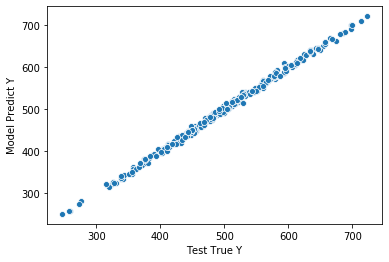

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d74353550>

In [0]:
sns.scatterplot(x='Test True Y',y='Model Predict Y',data=df_pred)

In [0]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [0]:
mean_absolute_error(df_pred['Test True Y'],df_pred['Model Predict Y'])

Out[166]: 3.9982917268944544

In [0]:
df.describe()

Out[167]:

,price,feature1,feature2
count,1000.000000,1000.000000,1000.000000
mean,498.673029,1000.014171,999.979847
std,93.785431,0.974018,0.948330
min,223.346793,997.058347,996.995651
25%,433.025732,999.332068,999.316106
50%,502.382117,1000.009915,1000.002243
75%,564.921588,1000.637580,1000.645380
max,774.407854,1003.207934,1002.666308


In [0]:
mean_squared_error(df_pred['Test True Y'],df_pred['Model Predict Y'])

Out[168]: 24.94652555812179

In [0]:
rmse = mean_squared_error(df_pred['Test True Y'],df_pred['Model Predict Y'])**0.5

In [0]:
rmse

Out[170]: 4.99464969323393

In [0]:
new_gem = [[998,1000]]

In [0]:
new_gem = scaler.transform(new_gem)

In [0]:
model.predict(new_gem)

Out[173]: array([[419.57303]], dtype=float32)

In [0]:
from tensorflow.keras.models import load_model

In [0]:
model.save('udemy_gem_model.h5')

In [0]:
generated_model = load_model('udemy_gem_model.h5')

In [0]:
generated_model.predict(new_gem)

Out[177]: array([[419.57303]], dtype=float32)

In [0]:
import matplotlib.pyplot as plt

In [0]:
df_spark = spark.read.csv('/FileStore/tables/kc_house_data.csv',inferSchema=True,header=True)

In [0]:
df = df_spark.toPandas()

In [0]:
df.isnull().sum()

Out[181]: id 0
date 0
price 0
bedrooms 0
bathrooms 0
sqft_living 0
sqft_lot 0
floors 0
waterfront 0
view 0
condition 0
grade 0
sqft_above 0
sqft_basement 0
yr_built 0
yr_renovated 0
zipcode 0
lat 0
long 0
sqft_living15 0
sqft_lot15 0
dtype: int64

In [0]:
df.describe().transpose()

Out[182]:

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [0]:
df.head()

Out[183]:

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Out[184]:

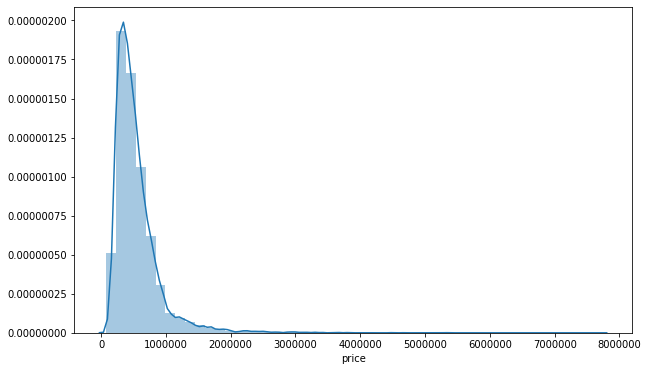

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e67b7d0>

In [0]:
plt.figure(figsize=(10,6))

sns.distplot(df['price'])

Out[185]:

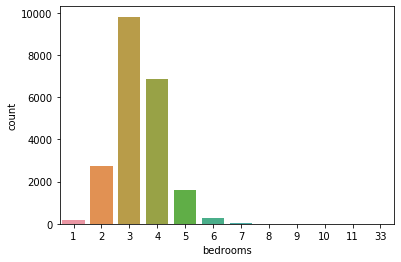

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e2264d0>

In [0]:
sns.countplot(df['bedrooms'])

In [0]:
df.corr()

Out[186]:

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.002727,0.011536,-0.023803,0.008188,-0.010799,-0.005193,0.021617,-0.016925,-0.008211,-0.001798,0.020672,-0.002701,-0.138557
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.266398,0.397370,0.036056,0.667951,0.605368,0.323799,0.053953,0.126424,-0.053402,0.306692,0.022036,0.585241,0.082845
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.006834,0.080008,0.026496,0.356563,0.479386,0.302808,0.155670,0.018389,-0.154092,-0.009951,0.132054,0.393406,0.030690
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.063744,0.188386,-0.126479,0.665838,0.686668,0.283440,0.507173,0.050544,-0.204786,0.024280,0.224903,0.569884,0.088303
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.103854,0.284709,-0.059445,0.762779,0.876448,0.435130,0.318152,0.055308,-0.199802,0.052155,0.241214,0.756402,0.184342
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.021632,0.074900,-0.008830,0.114731,0.184139,0.015418,0.052946,0.007686,-0.129586,-0.085514,0.230227,0.144763,0.718204
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.023755,0.028814,-0.264075,0.458794,0.523989,-0.245715,0.489193,0.006427,-0.059541,0.049239,0.125943,0.280102,-0.010722
waterfront,-0.002727,0.266398,-0.006834,0.063744,0.103854,0.021632,0.023755,1.000000,0.401971,0.016611,0.082888,0.072109,0.080559,-0.026153,0.092873,0.030272,-0.014306,-0.041904,0.086507,0.030781
view,0.011536,0.397370,0.080008,0.188386,0.284709,0.074900,0.028814,0.401971,1.000000,0.045999,0.251728,0.167609,0.277078,-0.053636,0.103951,0.084622,0.005871,-0.078107,0.280681,0.072904
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.016611,0.045999,1.000000,-0.146896,-0.158904,0.173849,-0.361592,-0.060788,0.002888,-0.015102,-0.105877,-0.093072,-0.003126


In [0]:
df.corr()['price'].sort_values()

Out[187]: zipcode -0.053402
id -0.016772
long 0.022036
condition 0.036056
yr_built 0.053953
sqft_lot15 0.082845
sqft_lot 0.089876
yr_renovated 0.126424
floors 0.256804
waterfront 0.266398
lat 0.306692
bedrooms 0.308787
sqft_basement 0.323799
view 0.397370
bathrooms 0.525906
sqft_living15 0.585241
sqft_above 0.605368
grade 0.667951
sqft_living 0.701917
price 1.000000
Name: price, dtype: float64

Out[188]:

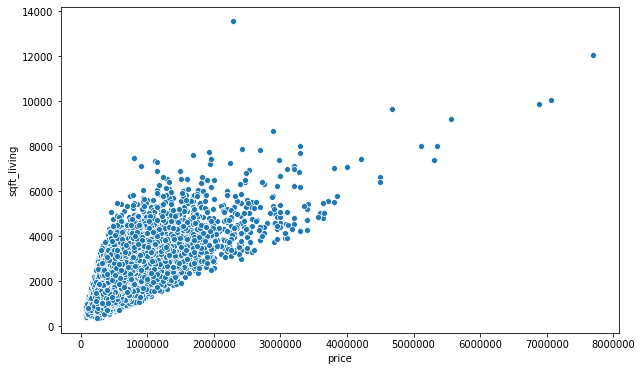

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d4e76afd0>

In [0]:
plt.figure(figsize=(10,6))

sns.scatterplot(x='price',y='sqft_living',data=df)

Out[189]:

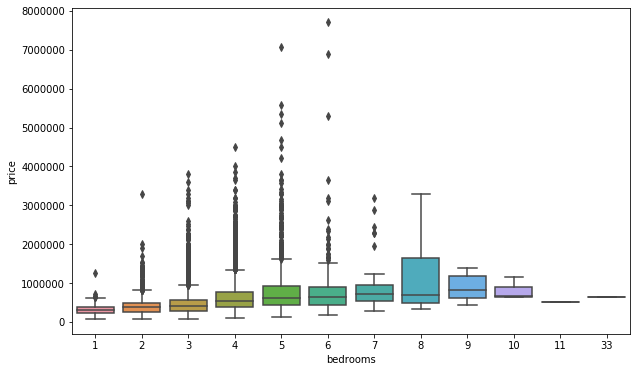

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d4e775390>

In [0]:
plt.figure(figsize=(10,6))

sns.boxplot(x='bedrooms',y='price',data=df)

In [0]:
df.columns

Out[190]: Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
 dtype='object')

Out[191]:

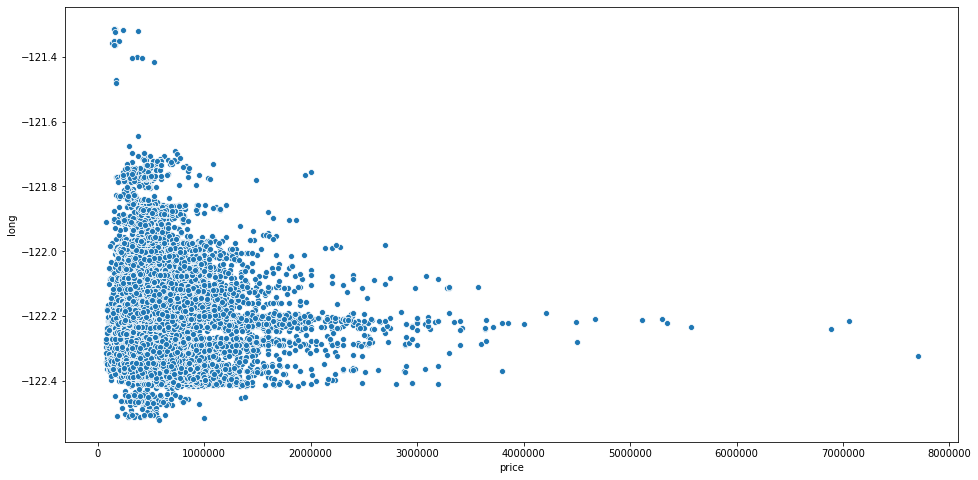

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e16d7d0>

In [0]:
plt.figure(figsize=(16,8))

sns.scatterplot(x='price',y='long',data=df)

Out[192]:

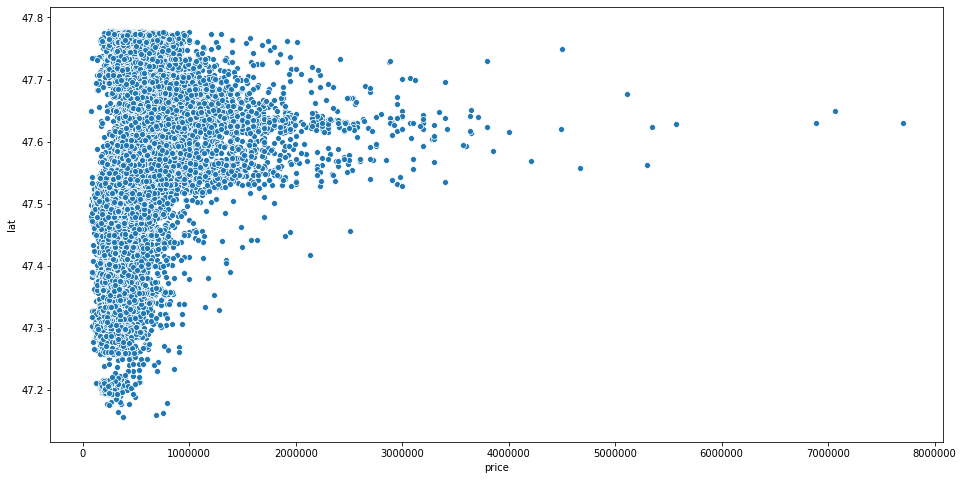

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e3f0350>

In [0]:
plt.figure(figsize=(16,8))

sns.scatterplot(x='price',y='lat',data=df)

Out[193]:

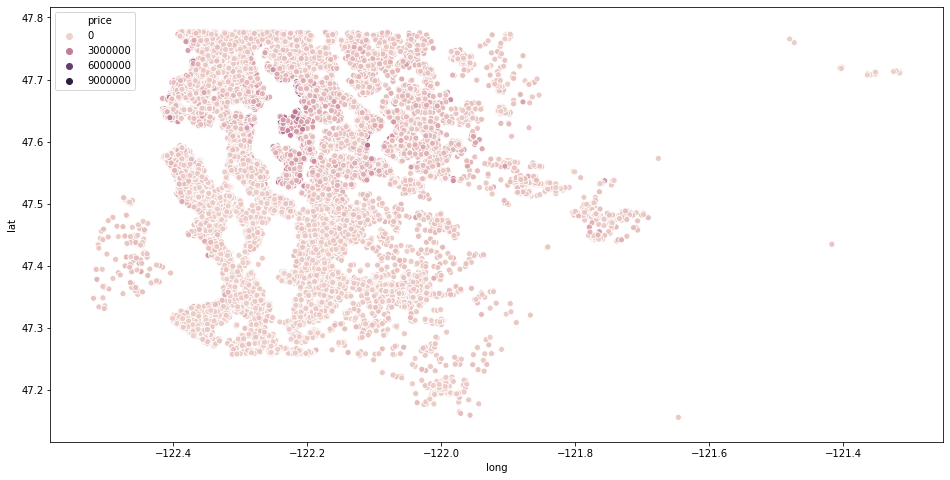

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e3a60d0>

In [0]:
plt.figure(figsize=(16,8))

sns.scatterplot(x='long',y='lat',hue='price',data=df)

In [0]:
df.sort_values('price',ascending=False).head(10)

Out[194]:

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,3,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


In [0]:
len(df)

Out[195]: 21597

In [0]:
len(df)*0.02

Out[196]: 431.94

In [0]:
exclude_98_perc = df.sort_values('price',ascending=False).iloc[432:]

Out[198]:

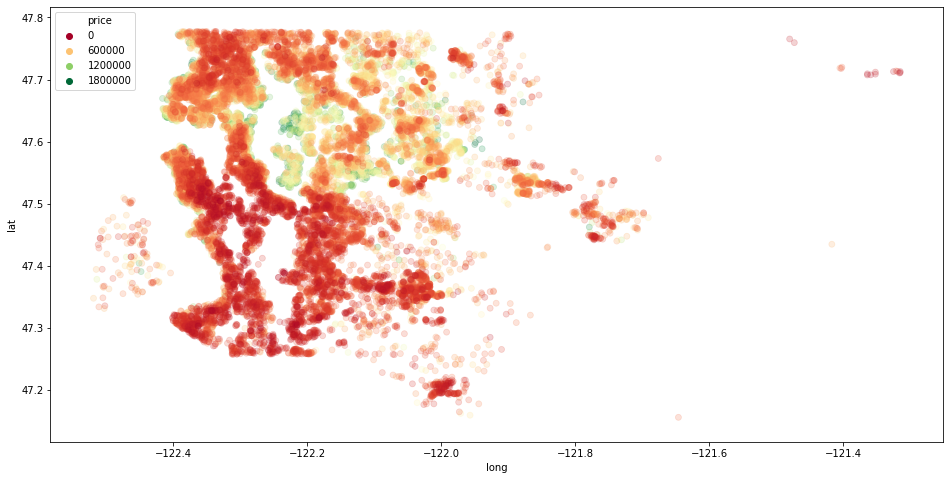

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3d4a9690>

In [0]:
plt.figure(figsize=(16,8))

sns.scatterplot(x='long'
                ,y='lat'
                ,hue='price'
                ,edgecolor=None
                ,alpha=0.2
                ,palette='RdYlGn'
                ,data=exclude_98_perc)

In [0]:
exclude_95_perc = df.sort_values('price',ascending=False).iloc[1080:]

Out[200]:

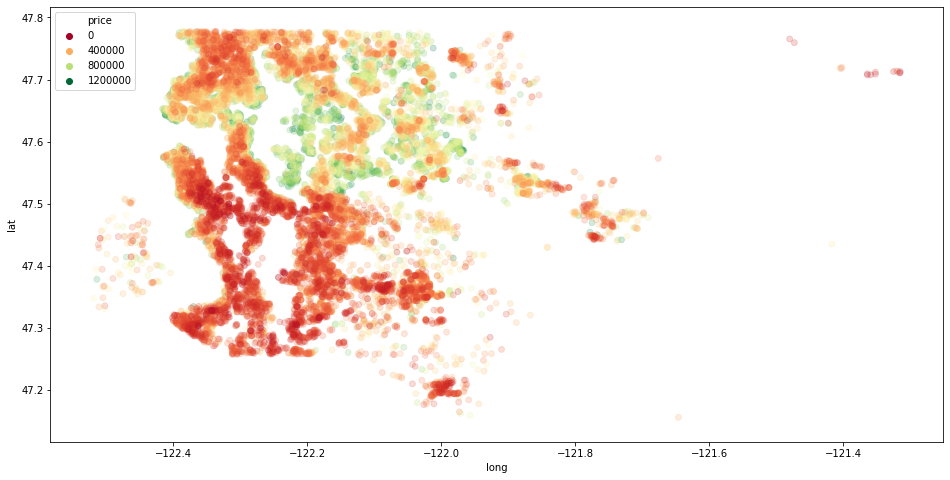

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3d4bba10>

In [0]:
plt.figure(figsize=(16,8))

sns.scatterplot(x='long'
                ,y='lat'
                ,hue='price'
                ,edgecolor=None
                ,alpha=0.2
                ,palette='RdYlGn'
                ,data=exclude_95_perc)

Out[201]:

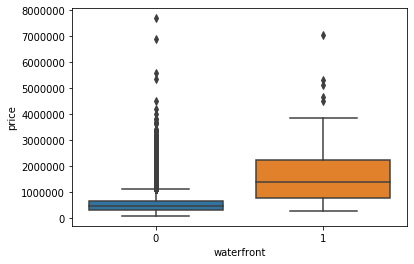

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d4e456550>

In [0]:
sns.boxplot(x='waterfront',y='price',data=df)

In [0]:
df_id = df['id']

df = df.drop('id',axis=1)

In [0]:
df['date'] = pd.to_datetime(df['date'])

In [0]:
df['date']

Out[204]: 0 2014-10-13
1 2014-12-09
2 2015-02-25
3 2014-12-09
4 2015-02-18
 ... 
21592 2014-05-21
21593 2015-02-23
21594 2014-06-23
21595 2015-01-16
21596 2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [0]:
# def extract_year(date):
#   return date.year

df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

Out[206]:

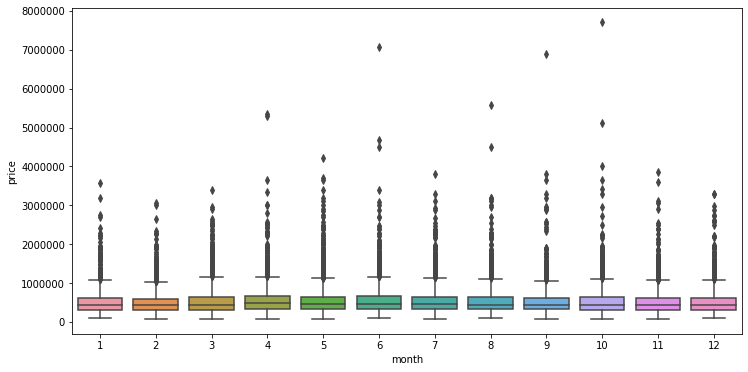

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d4e6e3a50>

In [0]:
plt.figure(figsize=(12,6))

sns.boxplot(x='month',y='price',data=df)

Out[207]:

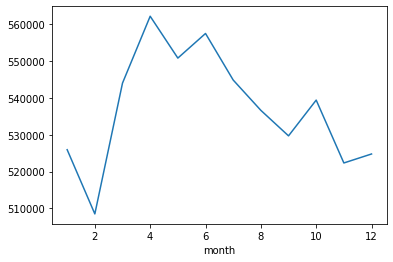

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3d5c7410>

In [0]:
df.groupby('month').mean()['price'].plot()

In [0]:
df.groupby('month').mean()['price']

Out[208]: month
1 525963.251534
2 508520.051323
3 544057.683200
4 562215.615074
5 550849.746893
6 557534.318182
7 544892.161013
8 536655.212481
9 529723.517787
10 539439.447228
11 522359.903478
12 524799.902041
Name: price, dtype: float64

Out[209]:

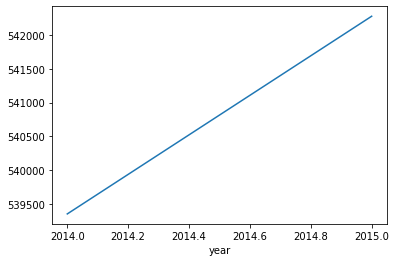

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d4e603f50>

In [0]:
df.groupby('year').mean()['price'].plot()

In [0]:
df = df.drop('date',axis=1)

In [0]:
df.columns

Out[211]: Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
 'sqft_living15', 'sqft_lot15', 'year', 'month'],
 dtype='object')

In [0]:
df.head()

Out[212]:

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [0]:
df['zipcode'].value_counts()

Out[213]: 98103 602
98038 589
98115 583
98052 574
98117 553
 ... 
98102 104
98010 100
98024 80
98148 57
98039 50
Name: zipcode, Length: 70, dtype: int64

In [0]:
df['zipcode'] = pd.qcut(df['zipcode'], q=10, labels=False)

In [0]:
df['zipcode'].value_counts()

Out[215]: 2 2541
5 2445
7 2273
0 2247
8 2244
1 2116
3 2076
6 1977
4 1905
9 1773
Name: zipcode, dtype: int64

In [0]:
df['yr_renovated'].value_counts()

Out[216]: 0 20683
2014 91
2013 37
2003 36
2000 35
 ... 
1934 1
1959 1
1951 1
1948 1
1944 1
Name: yr_renovated, Length: 70, dtype: int64

In [0]:
df['sqft_basement'].value_counts()

Out[217]: 0 13110
600 221
700 218
500 214
800 206
 ... 
792 1
2590 1
935 1
2390 1
248 1
Name: sqft_basement, Length: 306, dtype: int64

In [0]:
X = df.drop('price',axis=1).values
y = df['price'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [0]:
X_train.shape

Out[227]: (15117, 20)

In [0]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [0]:
model.fit(x=X_train
          ,y=y_train
          ,validation_data=(X_test,y_test)
          ,batch_size=64
          ,epochs=500
         )

Epoch 1/500
 1/237 [..............................] - ETA: 0s - loss: 557769687040.0000 54/237 [=====>........................] - ETA: 0s - loss: 428589711360.0000108/237 [============>.................] - ETA: 0s - loss: 425252028416.0000164/237 [===================>..........] - ETA: 0s - loss: 435001098240.0000216/237 [==========================>...] - ETA: 0s - loss: 430867218432.0000237/237 [==============================] - 0s 2ms/step - loss: 429737181184.0000 - val_loss: 415229214720.0000
Epoch 2/500
 1/237 [..............................] - ETA: 0s - loss: 373043986432.0000 57/237 [======>.......................] - ETA: 0s - loss: 440259805184.0000112/237 [=============>................] - ETA: 0s - loss: 415831949312.0000168/237 [====================>.........] - ETA: 0s - loss: 399969779712.0000217/237 [==========================>...] - ETA: 0s - loss: 380625747968.0000237/237 [==============================] - 0s 1ms/step - loss: 372631502848.0000 - val_loss: 248431869952.0000
Epoch 3/500
 1/237 [..............................] - ETA: 0s - loss: 256898957312.0000 56/237 [======>.......................] - ETA: 0s - loss: 230575865856.0000111/237 [=============>................] - ETA: 0s - loss: 199030718464.0000166/237 [====================>.........] - ETA: 0s - loss: 165783584768.0000216/237 [==========================>...] - ETA: 0s - loss: 148266401792.0000237/237 [==============================] - 0s 1ms/step - loss: 143876145152.0000 - val_loss: 98999410688.0000
Epoch 4/500
 1/237 [..............................] - ETA: 0s - loss: 57493606400.0000 55/237 [=====>........................] - ETA: 0s - loss: 107233673216.0000111/237 [=============>................] - ETA: 0s - loss: 107574681600.0000166/237 [====================>.........] - ETA: 0s - loss: 103228497920.0000223/237 [===========================>..] - ETA: 0s - loss: 101658476544.0000237/237 [==============================] - 0s 1ms/step - loss: 100595941376.0000 - val_loss: 95878119424.0000
Epoch 5/500
 1/237 [..............................] - ETA: 0s - loss: 53659246592.0000 56/237 [======>.......................] - ETA: 0s - loss: 112250257408.0000105/237 [============>.................] - ETA: 0s - loss: 103751262208.0000

In [0]:
losses = pd.DataFrame(model.history.history)

Out[235]:

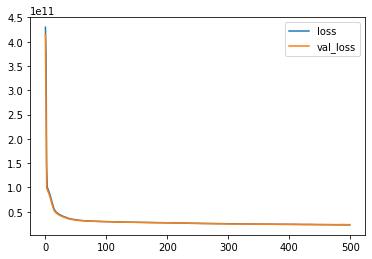

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e179b10>

In [0]:
losses.plot()

In [0]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [0]:
predictions = model.predict(X_test)

In [0]:
mse = mean_squared_error(y_test,predictions)

In [0]:
rmse = np.sqrt(mse)
rmse

Out[241]: 152618.2478952606

In [0]:
mean_absolute_error(y_test,predictions)

Out[242]: 94094.89075641397

In [0]:
df['price'].describe()

Out[243]: count 2.159700e+04
mean 5.402966e+05
std 3.673681e+05
min 7.800000e+04
25% 3.220000e+05
50% 4.500000e+05
75% 6.450000e+05
max 7.700000e+06
Name: price, dtype: float64

In [0]:
explained_variance_score(y_test,predictions)

Out[244]: 0.825001844495931

Out[246]:

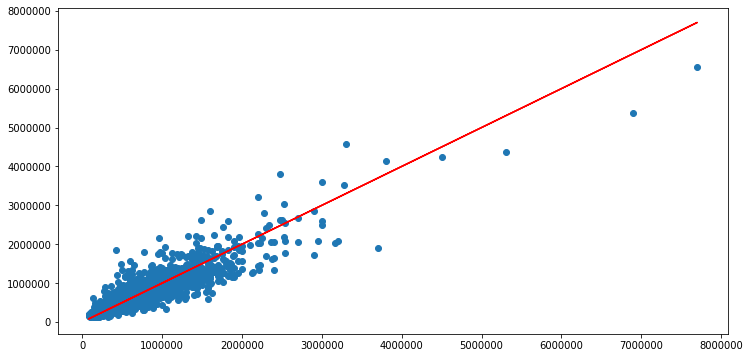

[<matplotlib.lines.Line2D at 0x7f6d3d7acfd0>]

In [0]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')

In [0]:
df_house1 = df.drop('price',axis=1).iloc[0]

In [0]:
df_house1

Out[251]: bedrooms 3.0000
bathrooms 1.0000
sqft_living 1180.0000
sqft_lot 5650.0000
floors 1.0000
waterfront 0.0000
view 0.0000
condition 3.0000
grade 7.0000
sqft_above 1180.0000
sqft_basement 0.0000
yr_built 1955.0000
yr_renovated 0.0000
zipcode 9.0000
lat 47.5112
long -122.2570
sqft_living15 1340.0000
sqft_lot15 5650.0000
year 2014.0000
month 10.0000
Name: 0, dtype: float64

In [0]:
df_house1 = scaler.transform(df_house1.values.reshape(-1,20))

In [0]:
model.predict(df_house1)

Out[254]: array([[271755.94]], dtype=float32)

In [0]:
df.head(1)

Out[255]:

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,0,9,47.5112,-122.257,1340,5650,2014,10


In [0]:
df_cancer = spark.read.csv('/FileStore/tables/cancer_classification.csv',inferSchema=True,header=True)

In [0]:
df_cancer = df_cancer.toPandas()

In [0]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 # Column Non-Null Count Dtype 
--- ------ -------------- ----- 
 0 mean radius 569 non-null float64
 1 mean texture 569 non-null float64
 2 mean perimeter 569 non-null float64
 3 mean area 569 non-null float64
 4 mean smoothness 569 non-null float64
 5 mean compactness 569 non-null float64
 6 mean concavity 569 non-null float64
 7 mean concave points 569 non-null float64
 8 mean symmetry 569 non-null float64
 9 mean fractal dimension 569 non-null float64
 10 radius error 569 non-null float64
 11 texture error 569 non-null float64
 12 perimeter error 569 non-null float64
 13 area error 569 non-null float64
 14 smoothness error 569 non-null float64
 15 compactness error 569 non-null float64
 16 concavity error 569 non-null float64
 17 concave points error 569 non-null float64
 18 symmetry error 569 non-null float64
 19 fractal dimension error 569 non-null float64
 20 worst radius 569 non-null float64
 21 worst texture 569 non-null float64
 22 worst perimeter 569 non-null float64
 23 worst area 569 non-null float64
 24 worst smoothness 569 non-null float64
 25 worst compactness 569 non-null float64
 26 worst concavity 569 non-null float64
 27 worst concave points 569 non-null float64
 28 worst symmetry 569 non-null float64
 29 worst fractal dimension 569 non-null float64
 30 benign_0__mal_1 569 non-null int32 
dtypes: float64(30), int32(1)
memory usage: 135.7 KB

In [0]:
df_cancer.describe().transpose()

Out[261]:

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Out[263]:

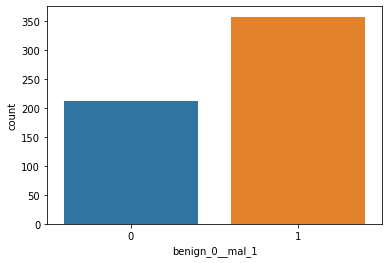

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3b900250>

In [0]:
sns.countplot(x='benign_0__mal_1',data=df_cancer)

In [0]:
df_cancer.corr()

Out[268]:

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


Out[269]:

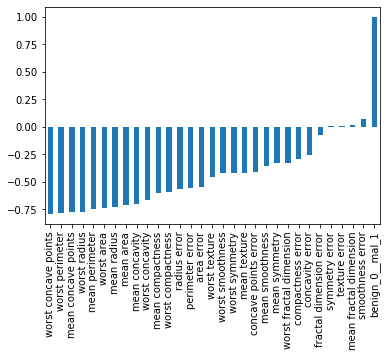

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3b876e50>

In [0]:
df_cancer.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

Out[270]:

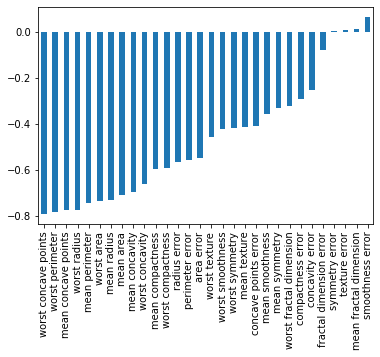

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3b71e950>

In [0]:
df_cancer.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

Out[273]:

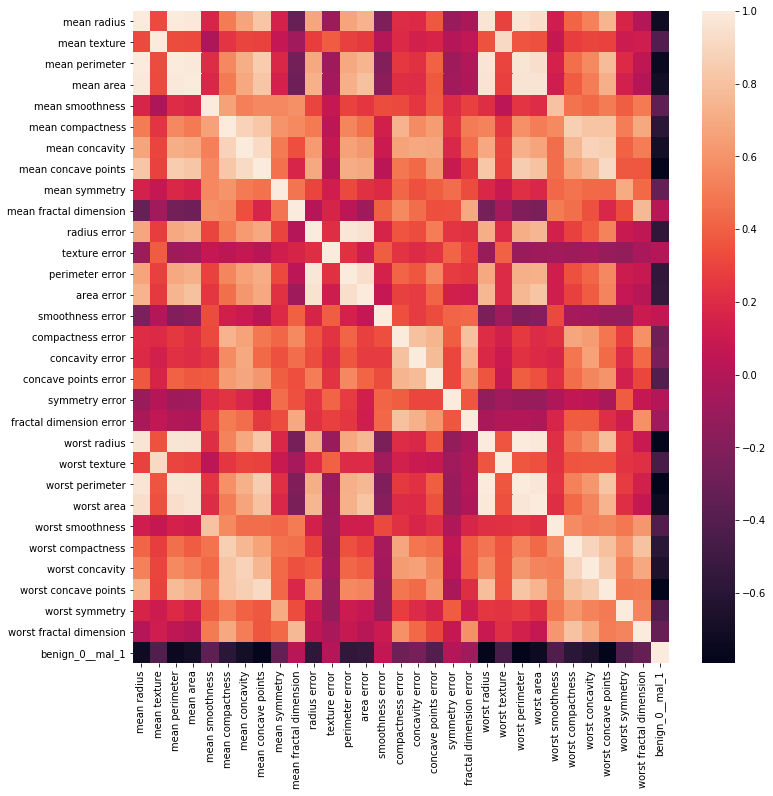

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d3e714750>

In [0]:
plt.figure(figsize=(12,12))
sns.heatmap(df_cancer.corr())

In [0]:
X = df_cancer.drop('benign_0__mal_1',axis=1).values
y = df_cancer['benign_0__mal_1'].values

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [0]:
from sklearn.preprocessing import MinMaxScaler

In [0]:
scaler = MinMaxScaler()

In [0]:
X_train = scaler.fit_transform(X_train)

In [0]:
X_test = scaler.transform(X_test)

In [0]:
X_train.shape

Out[290]: (455, 30)

In [0]:
model_cancer = Sequential()

model_cancer.add(Dense(32,activation='relu'))
model_cancer.add(Dense(16,activation='relu'))
model_cancer.add(Dense(8,activation='relu'))
model_cancer.add(Dense(1,activation='sigmoid'))

model_cancer.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
model_cancer.fit(x=X_train
                 ,y=y_train
                 ,epochs=600
                 ,validation_data=(X_test,y_test)
                )

Epoch 1/600
 1/15 [=>............................] - ETA: 0s - loss: 0.692115/15 [==============================] - 0s 9ms/step - loss: 0.6804 - val_loss: 0.6668
Epoch 2/600
 1/15 [=>............................] - ETA: 0s - loss: 0.663415/15 [==============================] - 0s 2ms/step - loss: 0.6455 - val_loss: 0.6248
Epoch 3/600
 1/15 [=>............................] - ETA: 0s - loss: 0.635415/15 [==============================] - 0s 2ms/step - loss: 0.5907 - val_loss: 0.5610
Epoch 4/600
 1/15 [=>............................] - ETA: 0s - loss: 0.534515/15 [==============================] - 0s 2ms/step - loss: 0.5201 - val_loss: 0.4855
Epoch 5/600
 1/15 [=>............................] - ETA: 0s - loss: 0.496615/15 [==============================] - 0s 2ms/step - loss: 0.4417 - val_loss: 0.4052
Epoch 6/600
 1/15 [=>............................] - ETA: 0s - loss: 0.422015/15 [==============================] - 0s 2ms/step - loss: 0.3656 - val_loss: 0.3296
Epoch 7/600
 1/15 [=>............................] - ETA: 0s - loss: 0.269015/15 [==============================] - 0s 2ms/step - loss: 0.3002 - val_loss: 0.2665
Epoch 8/600
 1/15 [=>............................] - ETA: 0s - loss: 0.218615/15 [==============================] - 0s 2ms/step - loss: 0.2484 - val_loss: 0.2274
Epoch 9/600
 1/15 [=>............................] - ETA: 0s - loss: 0.179615/15 [==============================] - 0s 2ms/step - loss: 0.2277 - val_loss: 0.2234
Epoch 10/600
 1/15 [=>............................] - ETA: 0s - loss: 0.249315/15 [==============================] - 0s 2ms/step - loss: 0.1963 - val_loss: 0.1750
Epoch 11/600
 1/15 [=>............................] - ETA: 0s - loss: 0.162215/15 [==============================] - 0s 3ms/step - loss: 0.1781 - val_loss: 0.1652
Epoch 12/600
 1/15 [=>............................] - ETA: 0s - loss: 0.263315/15 [==============================] - 0s 2ms/step - loss: 0.1664 - val_loss: 0.1611
Epoch 13/600
 1/15 [=>............................] - ETA: 0s - loss: 0.133615/15 [==============================] - 0s 2ms/step - loss: 0.1528 - val_loss: 0.1460
Epoch 14/600
 1/15 [=>............................] - ETA: 0s - loss: 0.187215/15 [==============================] - 0s 2ms/step - loss: 0.1405 - val_loss: 0.1427
Epoch 15/600
 1/15 [=>............................] - ETA: 0s - loss: 0.085915/15 [==============================] - 0s 2ms/step - loss: 0.1347 - val_loss: 0.1393
Epoch 16/600
 1/15 [=>............................] - ETA: 0s - loss: 0.172415/15 [==============================] - 0s 2ms/step - loss: 0.1329 - val_loss: 0.1412
Epoch 17/600
 1/15 [=>............................] - ETA: 0s - loss: 0.096215/15 [==============================] - 0s 2ms/step - loss: 0.1328 - val_loss: 0.1321
Epoch 18/600
 1/15 [=>............................] - ETA: 0s - loss: 0.0748

In [0]:
losses_cancer = pd.DataFrame(model_cancer.history.history)

Out[299]:

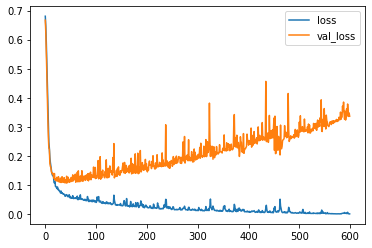

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d398709d0>

In [0]:
losses_cancer.plot()

In [0]:
model_cancer_v2 = Sequential()

model_cancer_v2.add(Dense(32,activation='relu'))
model_cancer_v2.add(Dense(16,activation='relu'))
model_cancer_v2.add(Dense(8,activation='relu'))
model_cancer_v2.add(Dense(1,activation='sigmoid'))

model_cancer_v2.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
from tensorflow.keras.callbacks import EarlyStopping

In [0]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 
 Stop training when a monitored metric has stopped improving.
 
 Assuming the goal of a training is to minimize the loss. With this, the
 metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 `model.fit()` training loop will check at end of every epoch whether
 the loss is no longer decreasing, considering the `min_delta` and
 `patience` if applicable. Once it's found no longer decreasing,
 `model.stop_training` is marked True and the training terminates.
 
 The quantity to be monitored needs to be available in `logs` dict.
 To make it so, pass the loss or metrics at `model.compile()`.
 
 Arguments:
 monitor: Quantity to be monitored.
 min_delta: Minimum change in the monitored quantity
 to qualify as an improvement, i.e. an absolute
 change of less than min_delta, will count as no
 improvement.
 patience: Number of epochs with no improvement
 after which training will be stopped.
 verbose: verbosity mode.
 mode: One of `{"auto", "min", "max"}`. In `min` mode,
 training will stop when the quantity
 monitored has stopped decreasing; in `"max"`
 mode it will stop when the quantity
 monitored has stopped increasing; in `"auto"`
 mode, the direction is automatically inferred
 from the name of the monitored quantity.
 baseline: Baseline value for the monitored quantity.
 Training will stop if the model doesn't show improvement over the
 baseline.
 restore_best_weights: Whether to restore model weights from
 the epoch with the best value of the monitored quantity.
 If False, the model weights obtained at the last step of
 training are used.
 
 Example:
 
 >>> callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
 >>> # This callback will stop the training when there is no improvement in
 >>> # the validation loss for three consecutive epochs.
 >>> model = tf.keras.models.Sequential([tf.keras.layers.Dense(10)])
 >>> model.compile(tf.keras.optimizers.SGD(), loss='mse')
 >>> history = model.fit(np.arange(100).reshape(5, 20), np.zeros(5),
 ... epochs=10, batch_size=1, callbacks=[callback],
 ... verbose=0)
 >>> len(history.history['loss']) # Only 4 epochs are run.
 4
 
 Method resolution order:
 EarlyStopping
 Callback
 builtins.object
 
 Methods defined here:
 
 __init__(self, monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 Initialize self. See help(type(self)) for accurate signature.
 
 get_monitor_value(self, logs)
 
 on_epoch_end(self, epoch, logs=None)
 Called at the end of an epoch.
 
 Subclasses should override for any actions to run. This function should only
 be called during TRAIN mode.
 
 Arguments:
 epoch: Integer, index of epoch.
 logs: Dict, metric results for this training epoch, and for the
 validation epoch if validation is performed. Validation result keys
 are prefixed with `val_`.
 
 on_train_begin(self, logs=None)
 Called at the beginning of training.
 
 Subclasses should override for any actions to run.
 
 Arguments:
 logs: Dict. Currently no data is passed to this argument for this method
 but that may change in the future.
 
 on_train_end(self, logs=None)
 Called at the end of training.
 
 Subclasses should override for any actions to run.
 
 Arguments:
 logs: Dict. Currently the output of the last call to `on_epoch_end()`
 is passed to this argument for this method but that may change in
 the future.
 
 ----------------------------------------------------------------------
 Methods inherited from Callback:
 
 on_batch_begin(self, batch, logs=None)
 A backwards compatibility alias for `on_train_batch_begin`.
 
 on_batch_end(self, batch, logs=None)
 A backwards compatibility alias for `on_train_batch_end`.
 
 on_epoch_begin(self, epoch, logs=None)
 Called at the start of an epoch.
 
 Sub

In [0]:
early_stop = EarlyStopping(monitor='val_loss'
                           ,mode='min'
                           ,verbose=2
                           ,patience=25
                          )

In [0]:
model_cancer_v2.fit(x=X_train
                 ,y=y_train
                 ,epochs=600
                 ,validation_data=(X_test,y_test)
                    ,callbacks=[early_stop]
                )

Epoch 1/600
 1/15 [=>............................] - ETA: 0s - loss: 0.720715/15 [==============================] - 0s 9ms/step - loss: 0.6908 - val_loss: 0.6636
Epoch 2/600
 1/15 [=>............................] - ETA: 0s - loss: 0.691615/15 [==============================] - 0s 2ms/step - loss: 0.6440 - val_loss: 0.6256
Epoch 3/600
 1/15 [=>............................] - ETA: 0s - loss: 0.599215/15 [==============================] - 0s 2ms/step - loss: 0.6066 - val_loss: 0.5899
Epoch 4/600
 1/15 [=>............................] - ETA: 0s - loss: 0.571515/15 [==============================] - 0s 2ms/step - loss: 0.5728 - val_loss: 0.5578
Epoch 5/600
 1/15 [=>............................] - ETA: 0s - loss: 0.560415/15 [==============================] - 0s 2ms/step - loss: 0.5436 - val_loss: 0.5276
Epoch 6/600
 1/15 [=>............................] - ETA: 0s - loss: 0.568815/15 [==============================] - 0s 2ms/step - loss: 0.5160 - val_loss: 0.5002
Epoch 7/600
 1/15 [=>............................] - ETA: 0s - loss: 0.565215/15 [==============================] - 0s 3ms/step - loss: 0.4904 - val_loss: 0.4737
Epoch 8/600
 1/15 [=>............................] - ETA: 0s - loss: 0.434515/15 [==============================] - 0s 2ms/step - loss: 0.4612 - val_loss: 0.4414
Epoch 9/600
 1/15 [=>............................] - ETA: 0s - loss: 0.434215/15 [==============================] - 0s 2ms/step - loss: 0.4273 - val_loss: 0.4056
Epoch 10/600
 1/15 [=>............................] - ETA: 0s - loss: 0.304215/15 [==============================] - 0s 3ms/step - loss: 0.3907 - val_loss: 0.3665
Epoch 11/600
 1/15 [=>............................] - ETA: 0s - loss: 0.425415/15 [==============================] - 0s 2ms/step - loss: 0.3504 - val_loss: 0.3311
Epoch 12/600
 1/15 [=>............................] - ETA: 0s - loss: 0.297715/15 [==============================] - 0s 2ms/step - loss: 0.3042 - val_loss: 0.2785
Epoch 13/600
 1/15 [=>............................] - ETA: 0s - loss: 0.321015/15 [==============================] - 0s 2ms/step - loss: 0.2616 - val_loss: 0.2398
Epoch 14/600
 1/15 [=>............................] - ETA: 0s - loss: 0.239415/15 [==============================] - 0s 2ms/step - loss: 0.2249 - val_loss: 0.2078
Epoch 15/600
 1/15 [=>............................] - ETA: 0s - loss: 0.214715/15 [==============================] - 0s 2ms/step - loss: 0.1932 - val_loss: 0.1909
Epoch 16/600
 1/15 [=>............................] - ETA: 0s - loss: 0.198715/15 [==============================] - 0s 2ms/step - loss: 0.1723 - val_loss: 0.1614
Epoch 17/600
 1/15 [=>............................] - ETA: 0s - loss: 0.096815/15 [==============================] - 0s 2ms/step - loss: 0.1590 - val_loss: 0.1627
Epoch 18/600
 1/15 [=>............................] - ETA: 0s - loss: 0.1444

Out[306]:

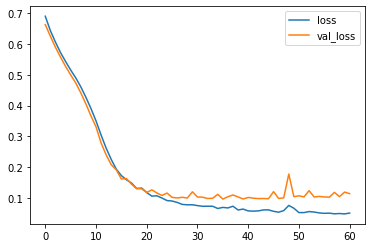

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d39800590>

In [0]:
model_loss = pd.DataFrame(model_cancer_v2.history.history)
model_loss.plot()

In [0]:
from tensorflow.keras.layers import Dropout

In [0]:
model_cancer_v3 = Sequential()

model_cancer_v3.add(Dense(32,activation='relu'))
model_cancer_v3.add(Dropout(0.5))

model_cancer_v3.add(Dense(16,activation='relu'))
model_cancer_v3.add(Dropout(0.5))

model_cancer_v3.add(Dense(1,activation='sigmoid'))

model_cancer_v3.compile(optimizer='adam',loss='binary_crossentropy')

In [0]:
model_cancer_v3.fit(x=X_train
                 ,y=y_train
                 ,epochs=600
                 ,validation_data=(X_test,y_test)
                    ,callbacks=[early_stop]
                )

Epoch 1/600
 1/15 [=>............................] - ETA: 0s - loss: 0.659815/15 [==============================] - 0s 9ms/step - loss: 0.6933 - val_loss: 0.6660
Epoch 2/600
 1/15 [=>............................] - ETA: 0s - loss: 0.687715/15 [==============================] - 0s 2ms/step - loss: 0.6710 - val_loss: 0.6418
Epoch 3/600
 1/15 [=>............................] - ETA: 0s - loss: 0.748315/15 [==============================] - 0s 2ms/step - loss: 0.6670 - val_loss: 0.6163
Epoch 4/600
 1/15 [=>............................] - ETA: 0s - loss: 0.684615/15 [==============================] - 0s 2ms/step - loss: 0.6216 - val_loss: 0.5847
Epoch 5/600
 1/15 [=>............................] - ETA: 0s - loss: 0.630615/15 [==============================] - 0s 2ms/step - loss: 0.5844 - val_loss: 0.5472
Epoch 6/600
 1/15 [=>............................] - ETA: 0s - loss: 0.650315/15 [==============================] - 0s 2ms/step - loss: 0.5709 - val_loss: 0.5090
Epoch 7/600
 1/15 [=>............................] - ETA: 0s - loss: 0.501315/15 [==============================] - 0s 2ms/step - loss: 0.5306 - val_loss: 0.4722
Epoch 8/600
 1/15 [=>............................] - ETA: 0s - loss: 0.548515/15 [==============================] - 0s 2ms/step - loss: 0.5207 - val_loss: 0.4384
Epoch 9/600
 1/15 [=>............................] - ETA: 0s - loss: 0.506715/15 [==============================] - 0s 2ms/step - loss: 0.4876 - val_loss: 0.4117
Epoch 10/600
 1/15 [=>............................] - ETA: 0s - loss: 0.452515/15 [==============================] - 0s 2ms/step - loss: 0.4607 - val_loss: 0.3817
Epoch 11/600
 1/15 [=>............................] - ETA: 0s - loss: 0.404115/15 [==============================] - 0s 2ms/step - loss: 0.4327 - val_loss: 0.3557
Epoch 12/600
 1/15 [=>............................] - ETA: 0s - loss: 0.420115/15 [==============================] - 0s 2ms/step - loss: 0.4265 - val_loss: 0.3367
Epoch 13/600
 1/15 [=>............................] - ETA: 0s - loss: 0.506415/15 [==============================] - 0s 2ms/step - loss: 0.4037 - val_loss: 0.3136
Epoch 14/600
 1/15 [=>............................] - ETA: 0s - loss: 0.410115/15 [==============================] - 0s 2ms/step - loss: 0.3944 - val_loss: 0.2996
Epoch 15/600
 1/15 [=>............................] - ETA: 0s - loss: 0.409215/15 [==============================] - 0s 2ms/step - loss: 0.3919 - val_loss: 0.2858
Epoch 16/600
 1/15 [=>............................] - ETA: 0s - loss: 0.339915/15 [==============================] - 0s 2ms/step - loss: 0.3658 - val_loss: 0.2669
Epoch 17/600
 1/15 [=>............................] - ETA: 0s - loss: 0.430115/15 [==============================] - 0s 2ms/step - loss: 0.3467 - val_loss: 0.2518
Epoch 18/600
 1/15 [=>............................] - ETA: 0s - loss: 0.2905

Out[310]:

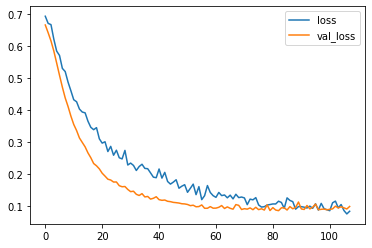

<matplotlib.axes._subplots.AxesSubplot at 0x7f6d37eb2890>

In [0]:
model_loss = pd.DataFrame(model_cancer_v3.history.history)
model_loss.plot()

In [0]:
predictions = model_cancer_v3.predict_classes(X_test)

WARNING:tensorflow:From <command-2757070764149474>:1: Sequential.predict_classes (from tensorflow.python.keras.engine.sequential) is deprecated and will be removed after 2021-01-01.
Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`, if your model does multi-class classification (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`, if your model does binary classification (e.g. if it uses a `sigmoid` last-layer activation).

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(classification_report(y_test,predictions))

precision recall f1-score support

 0 0.98 0.98 0.98 42
 1 0.99 0.99 0.99 72

 accuracy 0.98 114
 macro avg 0.98 0.98 0.98 114
weighted avg 0.98 0.98 0.98 114

In [0]:
print(confusion_matrix(y_test,predictions))

[[41 1]
 [ 1 71]]